In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from utils.ModifiedDeepestLSTMTinyPilotNet import DeepestLSTMTinyPilotNet
from utils.load_dataset import CARLADataset
from torch.utils.data import DataLoader


# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepestLSTMTinyPilotNet((288, 200, 6), 3)
model.load_state_dict(torch.load("v5.4_20 epochs.pth"))
model = model.to(device)
model.eval()

# Store ground truth and predictions
ground_truth = []
predictions = []

# Load the validation dataset
val_dataset = CARLADataset("../data/noisy_data_tm/val/")
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=False)


# Loop over validation data
with torch.no_grad():
    for images, speeds, controls_true in val_dataloader:
        images = images.to(device)
        speeds = speeds.to(device)
        controls_true = controls_true.to(device)

        # forward pass to get outputs
        controls_pred = model(images, speeds)

        ground_truth.extend(controls_true.cpu().numpy())
        predictions.extend(controls_pred.cpu().numpy())

# Convert lists to numpy arrays
ground_truth = np.array(ground_truth)
predictions = np.array(predictions)

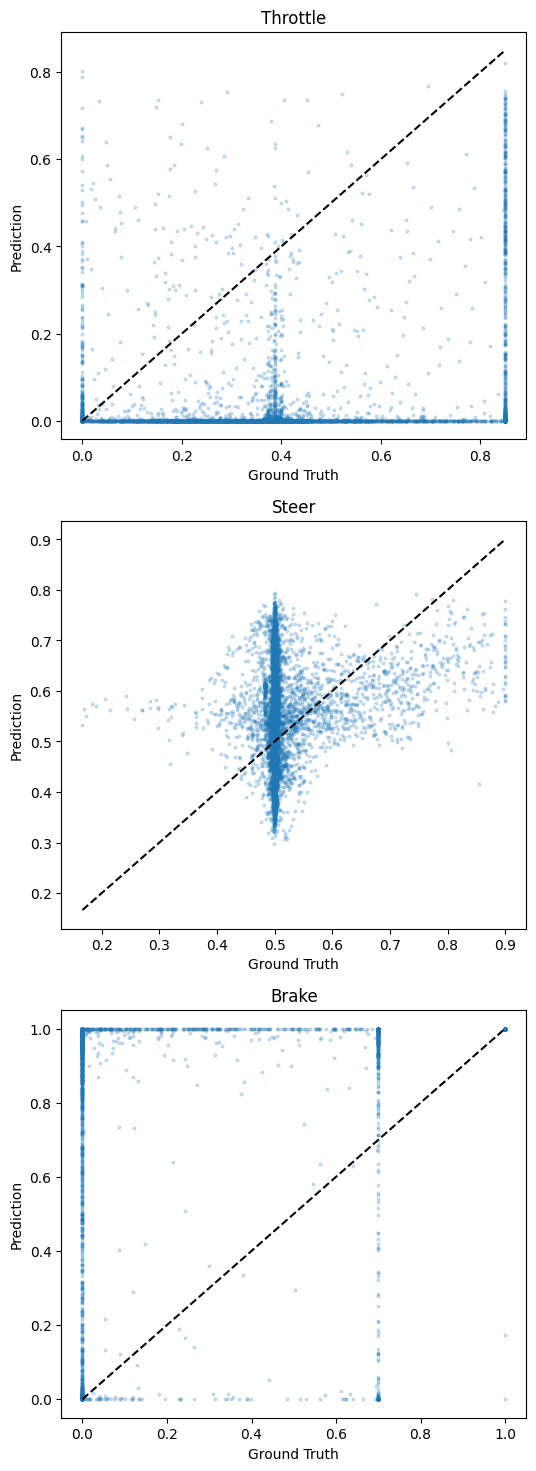

In [2]:
# Plot
fig, axs = plt.subplots(3, figsize=(6,18))

controls = ['Throttle', 'Steer', 'Brake']
for i in range(3):
    axs[i].scatter(ground_truth[:, i], predictions[:, i], s=15, marker='.', alpha=0.2)
    axs[i].plot([ground_truth[:, i].min(), ground_truth[:, i].max()], [ground_truth[:, i].min(), ground_truth[:, i].max()], 'k--')
    axs[i].set_xlabel('Ground Truth')
    axs[i].set_ylabel('Prediction')
    axs[i].set_title(controls[i])
    
plt.show()

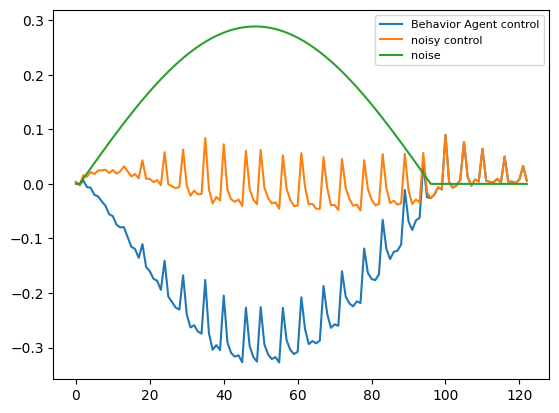

In [22]:
true_steer = [-0.10000000149011612, -0.18224963545799255, -0.18248268961906433, -0.1827157437801361, -0.18294879794120789, -0.18318185210227966, -0.18341490626335144, -0.18364796042442322, -0.1838810294866562, -0.18411408364772797, -0.18411408364772797, -0.17824794352054596, -0.16183683276176453, -0.061836834996938705, -0.08054812997579575, -0.07361757755279541, -0.06602755188941956, -0.05782143771648407, -0.051905352622270584, -0.045247409492731094, 0.05475258827209473, -0.021177077665925026, -0.021051965653896332, -0.010146036744117737, -0.008742868900299072, 0.061375685036182404, -0.008726405911147594, -0.007836446166038513, -0.004706511273980141, 0.004211327061057091, -0.0025263929273933172, 0.0028817658312618732, 0.04840783774852753, 0.0057374476455152035, -0.0026515796780586243, 0.007060366217046976, 0.036580104380846024, 0.006755908485502005, -0.0016886139055714011, 0.006283899303525686, 0.0018205525120720267, 0.03119034133851528, 0.00016405746282543987, 0.0029866949189454317, -0.00040604991954751313, 0.005963269621133804, 0.018196625635027885, 0.0052923779003322124, -0.002463117940351367, 0.004927964881062508, -0.00036804602132178843, 0.004606554284691811, 0.013048079796135426, 0.0038063996471464634, -0.0029210038483142853, 0.004042576067149639, -0.0013263290748000145, 0.014614446088671684, -0.0016120438231155276, 0.0030437929090112448, -0.0017593639204278588, 0.004050506744533777, -0.0016287253238260746, 0.011363969184458256, -0.001998528139665723, 0.002689796732738614, -0.0022794248070567846, 0.003703285241499543, 0.0036742622032761574, 0.0035607453901320696, -0.0028015526477247477, 0.003387424862012267, -0.001971061807125807, 0.007486818358302116, -0.0022461593616753817, 0.002726334147155285, -0.0024048087652772665, 0.003390560857951641, -0.0024439541157335043, 0.006487569771707058, -0.005884641781449318, -0.007005428895354271, -0.02002161741256714, -0.02297358214855194, -0.032130565494298935, -0.040146686136722565, -0.05556289106607437, -0.05918937921524048, -0.07497874647378922, -0.0797422006726265, -0.07934030890464783, -0.09734556823968887, -0.11509298533201218, -0.11924853920936584, -0.1355149745941162, -0.11038792878389359, -0.15229281783103943, -0.16025231778621674, -0.17396971583366394, -0.17773836851119995, -0.19424252212047577, -0.14082390069961548, -0.20652331411838531, -0.2164517045021057, -0.22669965028762817, -0.23026278614997864, -0.16755501925945282, -0.2395131140947342, -0.26315581798553467, -0.25896841287612915, -0.2706665098667145, -0.2743701934814453, -0.1761253923177719, -0.2737666070461273, -0.3039851784706116, -0.29551950097084045, -0.30465155839920044, -0.20465154945850372, -0.2905938923358917, -0.3099578619003296, -0.3166424334049225, -0.3141721487045288, -0.3268858790397644, -0.22688589990139008, -0.2970067858695984, -0.3173334300518036, -0.32581835985183716, -0.22581835091114044, -0.29416587948799133, -0.3125707507133484, -0.32107099890708923, -0.317388653755188, -0.3273290693759918, -0.2273290753364563, -0.2862965762615204, -0.3040432035923004, -0.3118602931499481, -0.3078417181968689, -0.20784172415733337, -0.26605117321014404, -0.2936561107635498, -0.28805282711982727, -0.29222023487091064, -0.28727516531944275, -0.18727515637874603, -0.23819583654403687, -0.26377344131469727, -0.2574518918991089, -0.26008859276771545, -0.16008859872817993, -0.20660720765590668, -0.21909281611442566, -0.2245132327079773, -0.21529662609100342, -0.21839432418346405, -0.11839433014392853, -0.16320012509822845, -0.17419284582138062, -0.17648984491825104, -0.1656983196735382, -0.06569831818342209, -0.11869857460260391, -0.13783736526966095, -0.12461098283529282, -0.12245319783687592, -0.11115331202745438, -0.011153309606015682, -0.06885116547346115, -0.08437241613864899, -0.06686507165431976, -0.06251125037670135, 0.037488747388124466, -0.024280915036797523, -0.026129592210054398, -0.019511118531227112, -0.006306816358119249, -0.010142314247786999, 0.08985768258571625, 0.0022492401767522097, -0.0069315992295742035, -0.002638295292854309, 0.00714369211345911, 0.07692340761423111, 0.013071241788566113, -0.003496904857456684, 0.007992532104253769, 0.004420290235430002, 0.06448239833116531, 0.0058757346123456955, 0.0035334411077201366, 0.0025750703644007444, 0.009375816211104393, 0.002435122849419713, 0.049892671406269073, 0.0037011706735938787, 0.004141645971685648, 0.001631657942198217, 0.007909542880952358, 0.032694533467292786, 0.005837040022015572, -0.002571382559835911, 0.005981846712529659, 0.000887559144757688, 0.028895167633891106, 7.515397010138258e-05, 0.0034044666681438684, -0.0003477600694168359, 0.005712603684514761, -0.0003015667025465518, 0.021979982033371925, -0.0011737645836547017, 0.002581013133749366, -0.0013680303236469626, 0.004824144300073385, 0.011631174013018608, 0.004400639794766903, -0.002705644816160202, 0.00416503706946969, -0.0011236825957894325, 0.003917571622878313, 0.008190491236746311, 0.003536643460392952, -0.002930616494268179, 0.0037729390896856785, -0.0018198629841208458, 0.010937422513961792, -0.0020590571220964193, 0.0029618905391544104, -0.0001821141631808132, 0.008919293992221355, 0.012347745709121227, 0.01670926623046398, 0.015251503325998783, 0.02611721307039261, 0.025400763377547264, 0.03617837280035019, 0.03466092422604561, 0.0453762523829937, 0.04513782635331154, 0.05631723627448082, 0.05675523728132248, 0.05905057117342949, 0.06604330986738205, 0.07794494926929474, 0.0769951120018959, 0.08812158554792404, 0.08806778490543365, 0.07679028064012527, 0.09541445970535278, 0.10835782438516617, 0.1063939705491066, 0.11672788113355637, 0.08344516903162003, 0.12362281233072281, 0.1259690523147583, 0.13358502089977264, 0.13163629174232483, 0.1425408124923706, 0.08972808718681335, 0.1463363766670227, 0.149644136428833, 0.15455280244350433, 0.15255464613437653, 0.10003186762332916, 0.15527507662773132, 0.17055048048496246, 0.1626581996679306, 0.17000505328178406, 0.1685362607240677, 0.09645064175128937, 0.16708160936832428, 0.18477372825145721, 0.17409870028495789, 0.17984411120414734, 0.0885607898235321, 0.17408402264118195, 0.18407489359378815, 0.1835929900407791, 0.1763402819633484, 0.08975937962532043, 0.17035043239593506, 0.1898457556962967, 0.1760072112083435, 0.17927028238773346, 0.07927028834819794, 0.169044628739357, 0.17944249510765076, 0.17675498127937317, 0.16740161180496216, 0.17400869727134705, 0.07400869578123093, 0.15722577273845673, 0.16689042747020721, 0.16334354877471924, 0.15436698496341705, 0.05436699092388153, 0.14048627018928528, 0.16116617619991302, 0.14441487193107605, 0.14442843198776245, 0.13789580762386322, 0.0378958098590374, 0.12225233763456345, 0.14082257449626923, 0.12249723821878433, 0.12164980173110962, 0.0216498002409935, 0.10301528871059418, 0.1097317636013031, 0.10491251200437546, 0.09261734783649445, 0.09577208012342453, -0.004227920901030302, 0.07809124141931534, 0.08347918838262558, 0.07563577592372894, 0.0627455934882164, -0.02091148868203163, 0.04933746159076691, 0.062051497399806976, 0.043461572378873825, 0.041360676288604736, 0.03194330632686615, -0.04233776032924652, 0.020713016390800476, 0.029150059446692467, 0.01004740223288536, 0.009653174318373203, -0.05626756697893143, 0.005250649061053991, 0.005083565600216389, 0.004364232532680035, -0.003831308800727129, -0.042560823261737823, -0.004271377809345722, 0.005239658989012241, -0.004760274197906256, -0.00046957971062511206, -0.005447957664728165, -0.033817123621702194, -0.005294960457831621, 0.0036852590274065733, -0.005337378941476345, -0.0005895022768527269, -0.03087626025080681, 0.00042374743497930467, -0.0023501762188971043, 0.0005693970015272498, -0.005759233608841896, 0.0006087290239520371, -0.024257086217403412, 0.0009899931028485298, -0.002873811637982726, 0.0009222622611559927, -0.00491384556517005, -0.013451145961880684, -0.00398810813203454, 0.002895240904763341, -0.00417850399389863, 0.001228863256983459, -0.014738742262125015, 0.0016034144209697843, -0.0030654766596853733, 0.0016823827754706144, -0.004056108184158802, 0.001610709703527391, -0.011539946310222149, 0.0020284743513911963, -0.0027003271970897913, 0.0022548306733369827, -0.0037916197907179594, -0.00381251098588109, -0.003574593458324671, 0.002772548235952854, -0.0033869578037410975, 0.0019316960824653506, -0.007596154697239399, 0.002257110783830285, -0.0027928375639021397, 0.0024896294344216585, -0.003372421022504568, 0.0024335107300430536, -0.006578234024345875, 0.002561363158747554, -0.0028184927068650723, 0.00237700785510242, -0.003018338466063142, -0.00011900366371264681, -0.0029707790818065405, 0.0028439220041036606, -0.003129034535959363, 0.002607357921078801, -0.0030701940413564444, 0.0007921311189420521, -0.003023939672857523, 0.0027518521528691053, -0.0028559542261064053, 0.0024208638351410627, -0.004227077588438988, 0.0026441323570907116, -0.0029748259112238884, 0.00273944903165102, -0.003008719068020582, 0.0027531743980944157, -0.004043307155370712, 0.0026832432486116886, -0.0026853056624531746, 0.002532463986426592, -0.002772029722109437, 0.0018920201109722257, -0.0029593217186629772, 0.0028762014117091894, -0.002920094644650817, 0.0027936201076954603, -0.0029569300822913647, 0.0021526247728616, -0.0027681714855134487, 0.002654746873304248, -0.002684840001165867, 0.002633966039866209, -0.0032865959219634533, 0.002889754017814994, -0.0029302069451659918, 0.00279204361140728, -0.0029313266277313232, 0.0028065848164260387, -0.003122214460745454, 0.002662635175511241, -0.002640285762026906, 0.0026403816882520914, -0.0030708233825862408, 0.0028817951679229736, -0.0028652965556830168, 0.0028405224438756704, -0.0028982297517359257, 0.002849160460755229, -0.0029918199870735407, 0.002704734681174159, -0.0026502807158976793, 0.0026592230424284935, -0.002736053429543972, 0.0026704848278313875, -0.002928850008174777, 0.0028885193169116974, -0.0028615924529731274, 0.0028705946169793606, -0.0028421618044376373, 0.0009640325442887843, -0.007566806394606829, -0.006021130830049515, -0.015347636304795742, -0.014119054190814495, -0.022399676963686943, -0.022224048152565956, -0.032775215804576874, -0.031739525496959686, -0.04242700710892677, -0.042018625885248184, -0.04446128383278847, -0.051146313548088074, -0.06243423745036125, -0.06158037856221199, -0.07225295901298523, -0.05543743073940277, -0.07965666055679321, -0.08028800040483475, -0.08970784395933151, -0.08862100541591644, -0.09954451769590378, -0.06994914263486862, -0.10634106397628784, -0.1083327904343605, -0.1157229021191597, -0.11378190666437149, -0.08421505987644196, -0.11806294322013855, -0.13154824078083038, -0.12637262046337128, -0.1350220888853073, -0.08481962233781815, -0.1392815262079239, -0.14186057448387146, -0.14599022269248962, -0.1424199789762497, -0.15222716331481934, -0.0835871696472168, -0.15055112540721893, -0.1551690548658371, -0.1574665606021881, -0.1526474952697754, -0.08821387588977814, -0.15288344025611877, -0.1680290699005127, -0.1570335477590561, -0.16211867332458496, -0.15885436534881592, -0.07820767909288406, -0.15215544402599335, -0.17004463076591492, -0.15694905817508698, -0.16042283177375793, -0.06616699695587158, -0.1530177891254425, -0.16205300390720367, -0.1585882306098938, -0.1490335911512375, -0.1553945690393448, -0.055394574999809265, -0.14027804136276245, -0.14895623922348022, -0.14532728493213654, -0.1359342783689499, -0.04333184286952019, -0.1257515251636505, -0.14417055249214172, -0.12698067724704742, -0.1269785761833191, -0.1203073114156723, -0.12535740435123444, -0.11835351586341858, -0.12213342636823654, -0.11501682549715042, -0.11845320463180542, -0.11145269125699997, -0.11501768976449966, -0.10787098854780197, -0.1119970753788948, -0.10527227073907852, -0.1099032387137413, -0.10459046810865402, -0.11115619540214539, -0.11048003286123276, -0.1245863288640976, 0.0]

noisy_steer = [-0.10000000149011612, -0.18224963545799255, -0.18248268961906433, -0.1827157437801361, -0.18294879794120789, -0.18318185210227966, -0.18341490626335144, -0.18364796042442322, -0.1838810294866562, -0.18411408364772797, -0.18411408364772797, -0.17824794352054596, -0.16183683276176453, -0.061836834996938705, -0.08054812997579575, -0.07361757755279541, -0.06602755188941956, -0.05782143771648407, -0.051905352622270584, -0.045247409492731094, 0.05475258827209473, -0.021177077665925026, -0.021051965653896332, -0.010146036744117737, -0.008742868900299072, 0.061375685036182404, -0.008726405911147594, -0.007836446166038513, -0.004706511273980141, 0.004211327061057091, -0.0025263929273933172, 0.0028817658312618732, 0.04840783774852753, 0.0057374476455152035, -0.0026515796780586243, 0.007060366217046976, 0.036580104380846024, 0.006755908485502005, -0.0016886139055714011, 0.006283899303525686, 0.0018205525120720267, 0.03119034133851528, 0.00016405746282543987, 0.0029866949189454317, -0.00040604991954751313, 0.005963269621133804, 0.018196625635027885, 0.0052923779003322124, -0.002463117940351367, 0.004927964881062508, -0.00036804602132178843, 0.004606554284691811, 0.013048079796135426, 0.0038063996471464634, -0.0029210038483142853, 0.004042576067149639, -0.0013263290748000145, 0.014614446088671684, -0.0016120438231155276, 0.0030437929090112448, -0.0017593639204278588, 0.004050506744533777, -0.0016287253238260746, 0.011363969184458256, -0.001998528139665723, 0.002689796732738614, -0.0022794248070567846, 0.003703285241499543, 0.0036742622032761574, 0.0035607453901320696, -0.0028015526477247477, 0.003387424862012267, -0.001971061807125807, 0.007486818358302116, -0.0022461593616753817, 0.002726334147155285, -0.0024048087652772665, 0.003390560857951641, -0.0024439541157335043, 0.01602787710726261, 0.013185542076826096, 0.021573778241872787, 0.01803535968065262, 0.024519553408026695, 0.024746794253587723, 0.026052702218294144, 0.019886137917637825, 0.025426790118217468, 0.018712034448981285, 0.022920742630958557, 0.03218253701925278, 0.022915232926607132, 0.0137742655351758, 0.018084248527884483, 0.010133177042007446, 0.04341632500290871, 0.009499352425336838, 0.0093508530408144, 0.0032589964102953672, 0.00692208856344223, -0.002352243522182107, 0.058086369186639786, -0.0008105565211735666, -0.004161403980106115, -0.00806394312530756, -0.005520747508853674, 0.06304759532213211, -0.0033020770642906427, -0.021594654768705368, -0.01232126820832491, -0.01920308917760849, -0.018365466967225075, 0.08414070308208466, -0.009523740969598293, -0.03605448827147484, -0.024193963035941124, -0.030227864161133766, 0.07257021963596344, -0.01087717991322279, -0.0280520748347044, -0.03285583108663559, -0.028815049678087234, -0.04027031734585762, 0.06067471578717232, -0.00881555862724781, -0.028826724737882614, -0.037311654537916183, 0.062372878193855286, -0.006605262868106365, -0.025955187156796455, -0.03571389988064766, -0.03360205143690109, -0.04542328417301178, 0.05238763615489006, -0.009074803441762924, -0.029619509354233742, -0.04053475335240364, -0.03991102799773216, 0.05640114098787308, -0.005785078275948763, -0.03765138238668442, -0.03658940643072128, -0.04557308927178383, -0.04571400210261345, 0.04893587902188301, -0.007593218237161636, -0.03903140127658844, -0.0388161838054657, -0.047798290848731995, 0.04562415927648544, -0.007696936838328838, -0.027202537283301353, -0.039852775633335114, -0.03806791454553604, -0.048791155219078064, 0.04339784011244774, -0.009395873174071312, -0.028544694185256958, -0.03915705904364586, -0.036831069737672806, 0.05456248298287392, -0.007175728213042021, -0.0351744219660759, -0.030920201912522316, -0.03783702850341797, -0.03570428118109703, 0.05504607781767845, -0.011973806656897068, -0.0368792824447155, -0.028808094561100006, -0.033932045102119446, 0.05655892938375473, -0.014740606769919395, -0.026129592210054398, -0.019511118531227112, -0.006306816358119249, -0.010142314247786999, 0.08985768258571625, 0.0022492401767522097, -0.0069315992295742035, -0.002638295292854309, 0.00714369211345911, 0.07692340761423111, 0.013071241788566113, -0.003496904857456684, 0.007992532104253769, 0.004420290235430002, 0.06448239833116531, 0.0058757346123456955, 0.0035334411077201366, 0.0025750703644007444, 0.009375816211104393, 0.002435122849419713, 0.049892671406269073, 0.0037011706735938787, 0.004141645971685648, 0.001631657942198217, 0.007909542880952358, 0.032694533467292786, 0.005837040022015572, -0.002571382559835911, 0.005981846712529659, 0.000887559144757688, 0.028895167633891106, 7.515397010138258e-05, 0.0034044666681438684, -0.0003477600694168359, 0.005712603684514761, -0.0003015667025465518, 0.021979982033371925, -0.0011737645836547017, 0.002581013133749366, -0.0013680303236469626, 0.004824144300073385, 0.011631174013018608, 0.004400639794766903, -0.002705644816160202, 0.00416503706946969, -0.0011236825957894325, 0.003917571622878313, 0.008190491236746311, 0.003536643460392952, -0.002930616494268179, 0.0037729390896856785, -0.0018198629841208458, 0.010937422513961792, -0.0020590571220964193, -0.002016743877902627, -0.010134370066225529, -0.005996562074869871, -0.0075166914612054825, -0.008083750493824482, -0.014445128850638866, -0.008453131653368473, -0.014008484780788422, -0.008030097000300884, -0.014302253723144531, -0.008292331360280514, -0.013182123191654682, -0.00659535638988018, -0.01068665087223053, -0.012852704152464867, -0.010248951613903046, -0.002659478923305869, -0.007840321399271488, -0.0008594301762059331, -0.004969217348843813, -0.02020902745425701, -0.005449484568089247, 0.0037308058235794306, -0.001890772022306919, 0.0048944479785859585, -0.031824346631765366, 0.005033278837800026, 0.004178911447525024, 0.008716904558241367, 0.0038159324321895838, 0.01189691387116909, -0.04360780492424965, 0.01044275239109993, 0.011329611763358116, 0.013956648297607899, 0.009818430989980698, -0.044700685888528824, 0.008691919036209583, 0.02226431481540203, 0.012818338349461555, 0.01876237243413925, 0.016043048352003098, -0.057139553129673004, 0.012549081817269325, 0.029454469680786133, 0.018149105831980705, 0.023421207442879677, -0.06817791610956192, 0.0171873327344656, 0.0271782036870718, 0.02685428224503994, 0.019917378202080727, -0.0661902129650116, 0.015031174756586552, 0.03531322628259659, 0.022417014464735985, 0.02677707001566887, -0.07197239249944687, 0.019204767420887947, 0.031156329438090324, 0.030171822756528854, 0.022669058293104172, 0.03127248212695122, -0.06658745557069778, 0.018911248072981834, 0.03099680319428444, 0.030007658526301384, 0.023723086342215538, -0.07345336675643921, 0.015618153847754002, 0.03937603533267975, 0.025825338438153267, 0.02915891632437706, 0.0260623749345541, -0.07038893550634384, 0.017625318840146065, 0.03995862975716591, 0.025497930124402046, 0.02861279994249344, -0.0673312172293663, 0.01817985624074936, 0.02912733517587185, 0.028620250523090363, 0.02071407251060009, 0.02833019196987152, -0.06714051216840744, 0.019771290943026543, 0.029810605570673943, 0.026672597974538803, 0.018537122756242752, -0.060320738703012466, 0.014767116867005825, 0.03235486522316933, 0.018668554723262787, 0.021496238186955452, 0.01702745072543621, -0.052290014922618866, 0.01573438197374344, 0.029150059446692467, 0.01004740223288536, 0.009653174318373203, -0.05626756697893143, 0.005250649061053991, 0.005083565600216389, 0.004364232532680035, -0.003831308800727129, -0.042560823261737823, -0.004271377809345722, 0.005239658989012241, -0.004760274197906256, -0.00046957971062511206, -0.005447957664728165, -0.033817123621702194, -0.005294960457831621, 0.0036852590274065733, -0.005337378941476345, -0.0005895022768527269, -0.03087626025080681, 0.00042374743497930467, -0.0023501762188971043, 0.0005693970015272498, -0.005759233608841896, 0.0006087290239520371, -0.024257086217403412, 0.0009899931028485298, -0.002873811637982726, 0.0009222622611559927, -0.00491384556517005, -0.013451145961880684, -0.00398810813203454, 0.002895240904763341, -0.00417850399389863, 0.001228863256983459, -0.014738742262125015, 0.0016034144209697843, -0.0030654766596853733, 0.0016823827754706144, -0.004056108184158802, 0.001610709703527391, -0.011539946310222149, 0.0020284743513911963, -0.0027003271970897913, 0.0022548306733369827, -0.0037916197907179594, -0.00381251098588109, -0.003574593458324671, 0.002772548235952854, -0.0033869578037410975, 0.0019316960824653506, -0.007596154697239399, 0.002257110783830285, -0.0027928375639021397, 0.0024896294344216585, -0.003372421022504568, 0.0024335107300430536, -0.006578234024345875, 0.002561363158747554, -0.0028184927068650723, 0.00237700785510242, -0.003018338466063142, -0.00011900366371264681, -0.0029707790818065405, 0.0028439220041036606, -0.003129034535959363, 0.002607357921078801, -0.0030701940413564444, 0.0007921311189420521, -0.003023939672857523, 0.0027518521528691053, -0.0028559542261064053, 0.0024208638351410627, -0.004227077588438988, 0.0026441323570907116, -0.0029748259112238884, 0.00273944903165102, -0.003008719068020582, 0.0027531743980944157, -0.004043307155370712, 0.0026832432486116886, -0.0026853056624531746, 0.002532463986426592, -0.002772029722109437, 0.0018920201109722257, -0.0029593217186629772, 0.0028762014117091894, -0.002920094644650817, 0.0027936201076954603, -0.0029569300822913647, 0.0021526247728616, -0.0027681714855134487, 0.002654746873304248, -0.002684840001165867, 0.002633966039866209, -0.0032865959219634533, 0.002889754017814994, -0.0029302069451659918, 0.00279204361140728, -0.0029313266277313232, 0.0028065848164260387, -0.003122214460745454, 0.002662635175511241, -0.002640285762026906, 0.0026403816882520914, -0.0030708233825862408, 0.0028817951679229736, -0.0028652965556830168, 0.0028405224438756704, -0.0028982297517359257, 0.002849160460755229, -0.0029918199870735407, 0.002704734681174159, -0.0026502807158976793, 0.0026592230424284935, -0.002736053429543972, 0.0026704848278313875, -0.002928850008174777, 0.0028885193169116974, -0.0028615924529731274, 0.0028705946169793606, 0.0017697741277515888, 0.010182861238718033, 0.006248834542930126, 0.012376215308904648, 0.007611297536641359, 0.01337636262178421, 0.009602156467735767, 0.014249208383262157, 0.00812958087772131, 0.01355208270251751, 0.007201886735856533, 0.011893285438418388, 0.013674692250788212, 0.011150157079100609, 0.003954607527703047, 0.008828246034681797, 0.002098453463986516, 0.022775467485189438, 0.0023321991320699453, 0.005387166980654001, -0.0004400531470309943, 0.004141795448958874, -0.00338814128190279, 0.029495663940906525, -0.003716569161042571, -0.0026408256962895393, -0.007079039700329304, -0.002304947469383478, 0.029973097145557404, -0.0012884498573839664, -0.012315102852880955, -0.004811218474060297, -0.011265347711741924, 0.040997132658958435, -0.011542337946593761, -0.01233863364905119, -0.01482715830206871, -0.009759217500686646, -0.01821376569569111, 0.05163232237100601, -0.014273401349782944, -0.01798211596906185, -0.019520418718457222, -0.014092991128563881, 0.0507974810898304, -0.013567234389483929, -0.02856035716831684, -0.017564835026860237, -0.02280246838927269, -0.019843006506562233, 0.060346826910972595, -0.014209301210939884, -0.03285769000649452, -0.020671334117650986, -0.025203341618180275, 0.0678464025259018, -0.020357027649879456, -0.03088993951678276, -0.029066288843750954, -0.021294403821229935, -0.029577815905213356, 0.06836216896772385, -0.018716638907790184, -0.02972310222685337, -0.028552791103720665, -0.02174612134695053, 0.06814511865377426, -0.017107663676142693, -0.038478586822748184, -0.024356182664632797, -0.027533769607543945, -0.02415093407034874, -0.032594602555036545, -0.02908572554588318, -0.03645825758576393, -0.03302796557545662, -0.04024030640721321, -0.03710127994418144, -0.04460906609892845, -0.041482143104076385, -0.049700602889060974, -0.04713629558682442, -0.05599132925271988, -0.05496157333254814, -0.06586458534002304, -0.069575235247612, -0.08811306953430176, 0.032001834362745285]

xx = np.arange(0, 200-77)
plt.plot(xx, true_steer[77:200], label='Behavior Agent control')
plt.plot(xx, noisy_steer[77:200], label='noisy control')
plt.plot(xx, np.array(noisy_steer[77:200]) - np.array(true_steer[77:200]), label='noise')
#plt.plot(xx, np.array(noisy_steer) - np.array(true_steer))
plt.legend(fontsize=8)
plt.show()

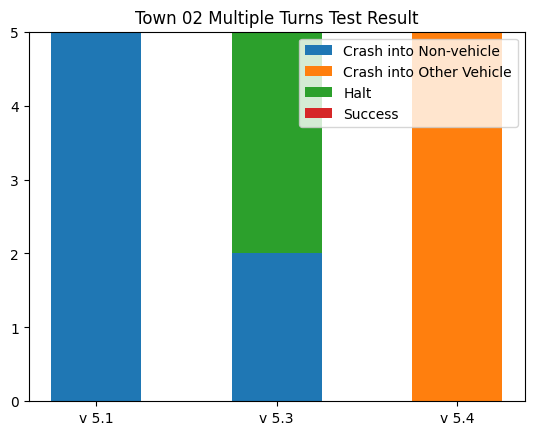

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "v 5.1",
    "v 5.3",
    "v 5.4",
)

weight_counts = {
    "Crash into Non-vehicle": np.array([5, 2, 0]),
    "Crash into Other Vehicle": np.array([0, 0, 5]),
    "Halt": np.array([0, 3, 0]),
    "Success": np.array([0, 0, 0]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Town 02 Multiple Turns Test Result")
ax.legend(loc="upper right")

plt.show()